# Sales Prediction and Advertising Impact Analysis

## Business Understanding
### Problem Statement
 ##### The business invests in multiple advertising channels (TV, Radio, Newspaper) but lacks clarity on:
+ Which channels most strongly drive sales

+ How changes in advertising spend affect sales outcomes

+ How to forecast future sales to support marketing decisions

* Without data-driven insights, marketing budgets may be inefficiently allocated, reducing return on investment (ROI).

### Key Stakeholders

+ Marketing Managers – optimize advertising budget allocation

+ Sales Leadership – forecast future sales and set targets

+ Business Executives – make strategic investment decisions

+ Data Analysts – develop predictive and analytical models

### Objectives

* Predict future sales using advertising spend data

* Quantify the impact of each advertising channel on sales

* Support marketing strategy with actionable, data-driven insights

* Build a reliable regression-based forecasting model

## Data Understanding
#### Dataset Description
* Source: Advertising dataset

* Observations: 200 records

##### Features:
* TV: Advertising spend on TV

* Radio: Advertising spend on Radio

* Newspaper: Advertising spend on Newspaper

##### Target Variable:
*Sales: Product sales volume

In [30]:
# Import  libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
# Load the dataset
df = pd.read_csv('Advertising.csv')
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [32]:
#Data types  and structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [33]:
# Summary statistics
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [34]:
# Check for missing values
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [35]:
#check for duplicates
df.duplicated().sum()

0

In [36]:
#Adding Business Variables(Target Segment and Platform )
np.random.seed(42)
df['Target_Segment'] = np.random.choice(['Youth', 'Adult', 'Senior'], size=len(df))
df['Platform'] = np.random.choice(['Online', 'Offline'], size=len(df))


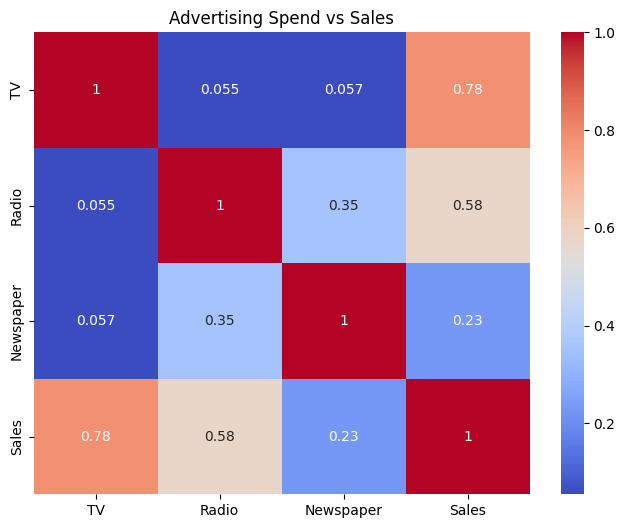

In [ ]:
# Correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df[['TV','Radio','Newspaper','Sales']].corr(), annot=True, cmap='coolwarm')
plt.title('Advertising Spend vs Sales')
plt.show()


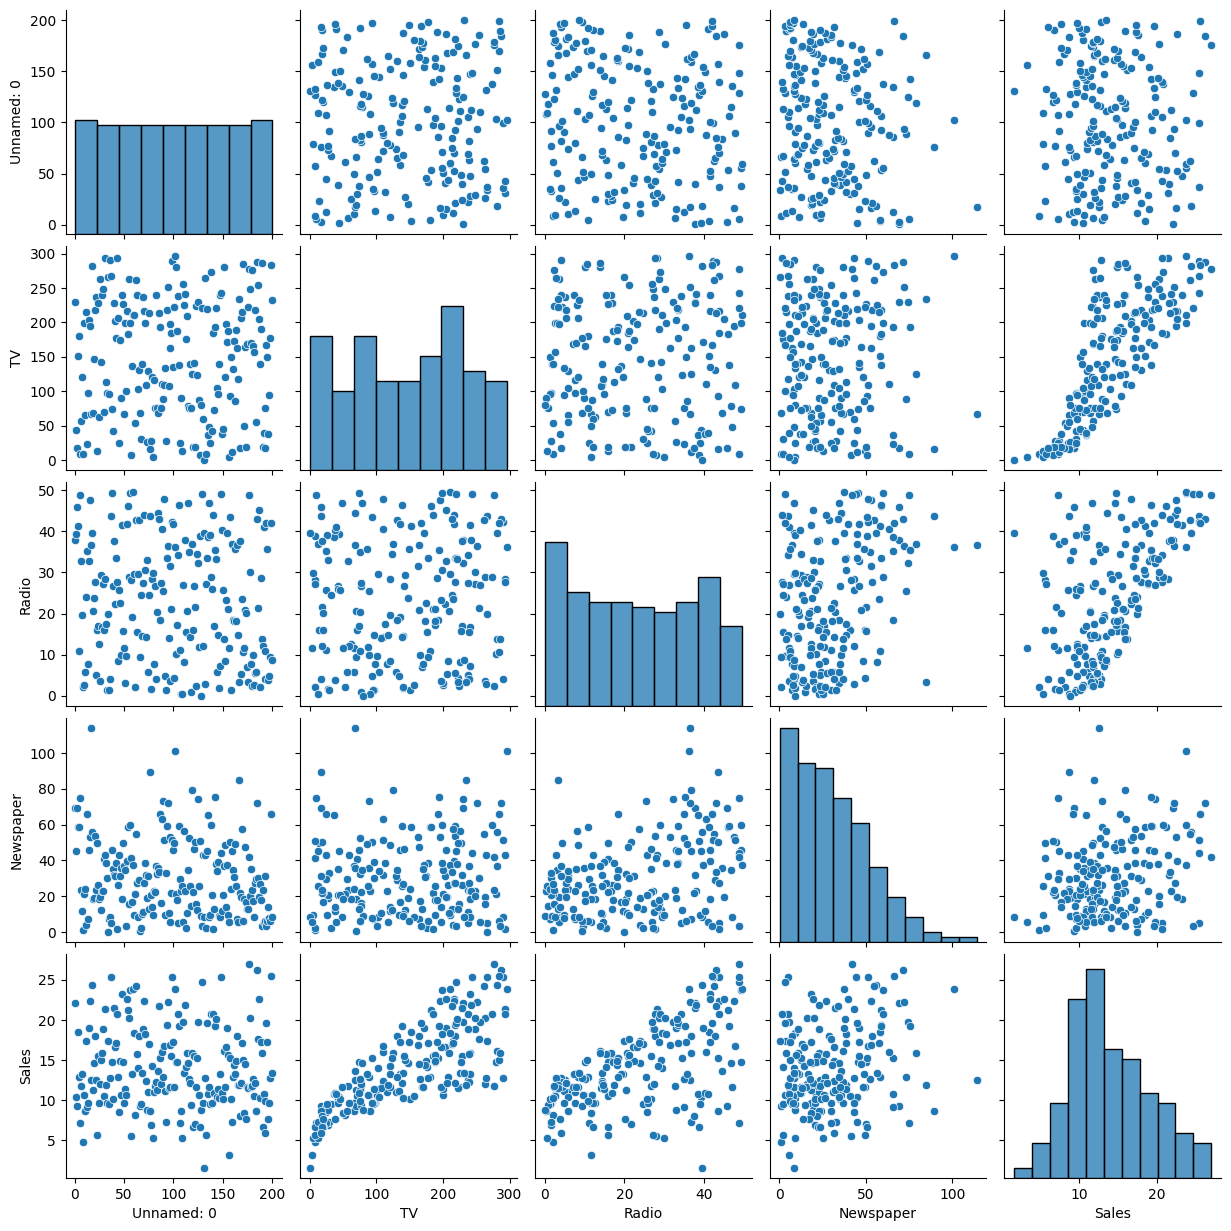

In [39]:
# Visualize relationships between advertising channels and sales
sns.pairplot(df)
plt.show()


#### Observattions
* TV vs Sales: Has Strong positive relationship 
 More TV advertising has means higher sales.

* Radio vs Sales:Has Moderate positive relationship
 Radio ads also help, but less than TV.

* Newspaper vs Sales: Has Weak  relationship
 Newspaper ads don’t strongly affect sales.

### Feature Selection

In [41]:
X = df.drop('Sales', axis=1)
y = df['Sales']

numeric_features = ['TV', 'Radio', 'Newspaper']
categorical_features = ['Target_Segment', 'Platform']


## Data Preparation

In [40]:
# Remove unnecessary index column 
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df

,TV,Radio,Newspaper,Sales,Target_Segment,Platform
0,230.1,37.8,69.2,22.1,Senior,Offline
1,44.5,39.3,45.1,10.4,Youth,Online
2,17.2,45.9,69.3,9.3,Senior,Offline
3,151.5,41.3,58.5,18.5,Senior,Online
4,180.8,10.8,58.4,12.9,Youth,Offline
...,...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,Adult,Online
196,94.2,4.9,8.1,9.7,Senior,Offline
197,177.0,9.3,6.4,12.8,Senior,Online
198,283.6,42.0,66.2,25.5,Adult,Offline


In [44]:
# Encode categorical variables
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ]
)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(f'Training set size: {X_train.shape[0]} samples')
print(f'Test set size: {X_test.shape[0]} samples')  


Training set size: 160 samples
Test set size: 40 samples


## Business Analysis

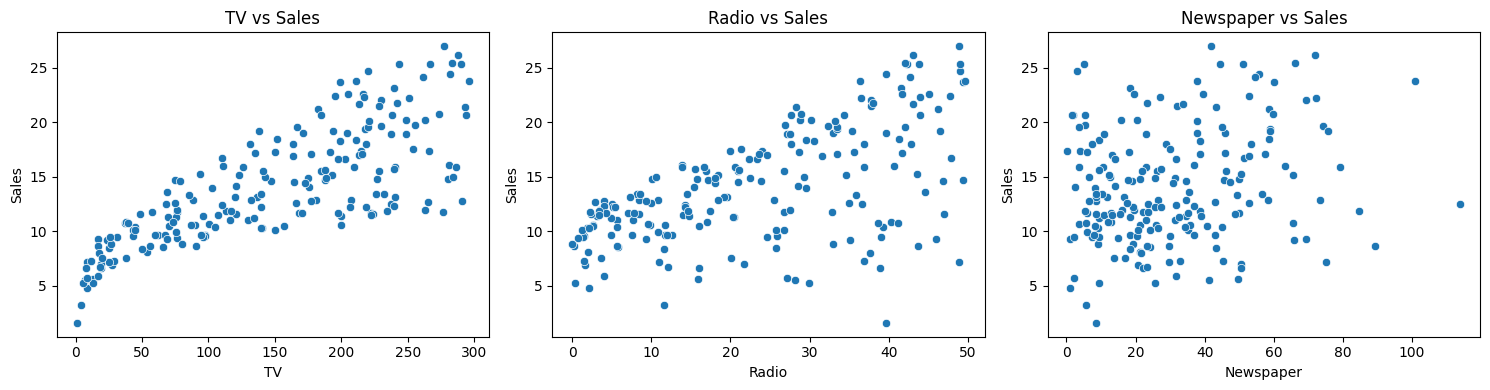

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sales vs Advertising Spend
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

sns.scatterplot(x='TV', y='Sales', data=df, ax=axes[0])
axes[0].set_title('TV vs Sales')

sns.scatterplot(x='Radio', y='Sales', data=df, ax=axes[1])
axes[1].set_title('Radio vs Sales')

sns.scatterplot(x='Newspaper', y='Sales', data=df, ax=axes[2])
axes[2].set_title('Newspaper vs Sales')

plt.tight_layout()
plt.show()


### Observations
* more TV advertising has higher sales.
* radio ads help increase sales, but not as strongly as TV
* Newspaper advertising has little  effect on sales.


## Modelling
+ Regression to measure advertising impact 





##### REGRESSION MODEL

In [46]:
# Regression pipeline
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train model
model.fit(X_train, y_train)



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['TV', 'Radio', 'Newspaper']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['Target_Segment',
                                                   'Platform'])])),
                ('regressor', LinearRegression())])

### Model Evaluation

In [47]:
# Predictions
y_pred = model.predict(X_test)

# Evaluation metrics
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R² Score:", r2)
print("RMSE:", rmse)



R² Score: 0.9020528511578587
RMSE: 1.7582843953763934


In [ ]:
# Make predictions  dataframe variables
predictions_df = pd.DataFrame({
    'Actual_Sales': y_test,
    'Predicted_Sales': y_pred
})
predictions_df.head()

,Actual_Sales,Predicted_Sales
95,16.9,16.246893
15,22.4,21.063661
30,21.4,21.864861
158,7.3,10.435894
128,24.7,22.197518


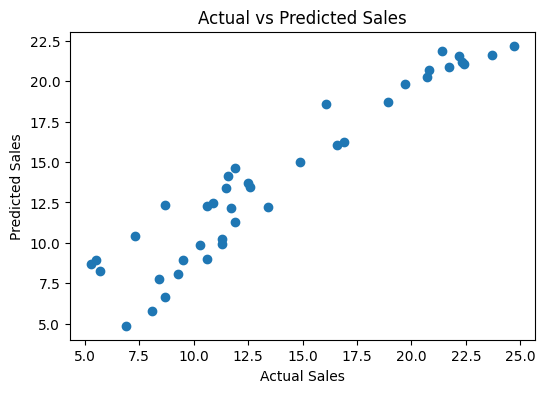

In [49]:
#plot actual vs predicted
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()


### Advertising Impact Analysis (Regression Coefficients)

In [50]:
# Get feature names after encoding
feature_names = (
    numeric_features +
    list(model.named_steps['preprocessor']
         .named_transformers_['cat']
         .get_feature_names_out(categorical_features))
)

coefficients = model.named_steps['regressor'].coef_

impact_df = pd.DataFrame({
    'Feature': feature_names,
    'Impact_on_Sales': coefficients
}).sort_values(by='Impact_on_Sales', ascending=False)

impact_df


,Feature,Impact_on_Sales
5,Platform_Online,0.351264
1,Radio,0.188308
0,TV,0.044665
2,Newspaper,0.004909
3,Target_Segment_Senior,-0.126277
4,Target_Segment_Youth,-0.147133


## Business insights
+ Platform_Online (+0.35) is the most influential factor in driving sales.
+ Radio has the strongest advertising spend impact after platform.
+ TV (+0.04) contributes positively but at a lower marginal rate.
+ Senior (-0.13) and Youth (-0.15) segments show lower sales response

## Strategic Business Recommendations
+ Increasing  budget allocation to digital platforms
+ Increasing Radio Advertising Investment
+ Reallocate Newspaper budget to Online or Radio
+ Improving engagement and conversion across all customer groups.